In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Data Understanding & Exploration (EDA)

In [4]:
import pandas as pd

# Load data
df = pd.read_csv(
    'D:\guvi\PowerPulse Household\individual+household+electric+power+consumption\household_power_consumption.txt',
    sep=';',                      # Separator is semicolon
    parse_dates={'datetime': ['Date', 'Time']},  # Combine date and time
    infer_datetime_format=True,   # Speed up datetime parsing
    na_values='?',                # Treat '?' as NaN
    low_memory=False              # Avoid dtype warning
)

# Preview the data
df.head()


C:\Users\vicky\AppData\Local\Temp\ipykernel_12800\3389696658.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\vicky\AppData\Local\Temp\ipykernel_12800\3389696658.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\vicky\AppData\Local\Temp\ipykernel_12800\3389696658.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [6]:
df.describe()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [7]:
df.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Filling missing values using Interpolation method

In [8]:
# Interpolation for all columns based on time
df.set_index('datetime', inplace=True)
df.interpolate(method='time', inplace=True)


In [9]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
df.reset_index(inplace=True)

<Axes: title={'center': 'Power Usage Over Time'}>

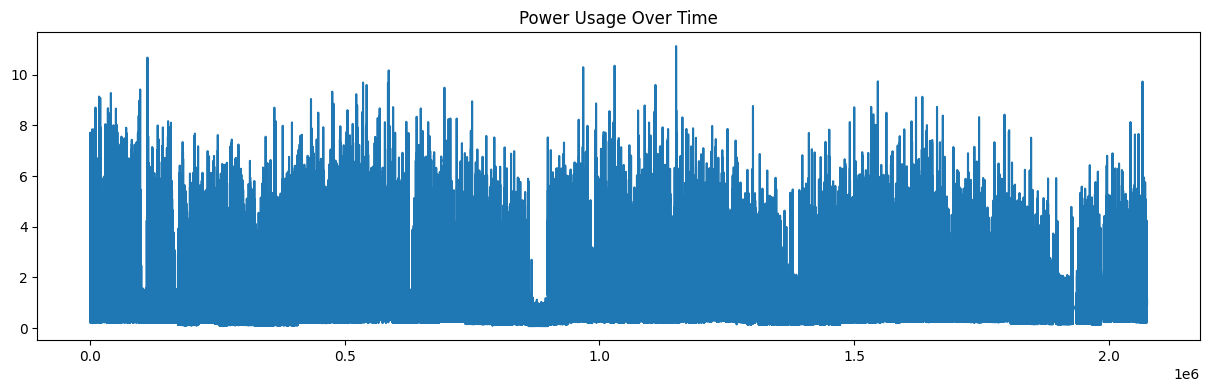

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Global_active_power'].plot(figsize=(15,4), title='Power Usage Over Time')

<Axes: >

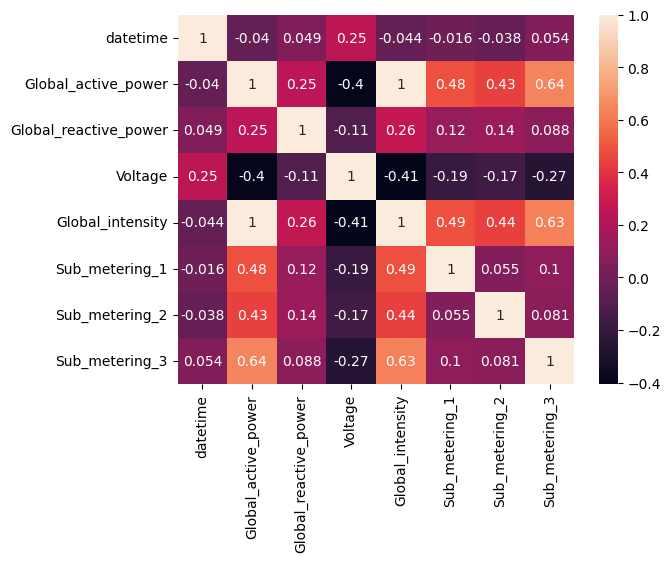

In [12]:
df.corr()
sns.heatmap(df.corr(), annot=True)


Feature extraction:

In [14]:
import pandas as pd

df['datetime'] = pd.to_datetime(df['datetime'])

df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday

# Daily average Global Active Power
df['daily_avg_power'] = df.groupby(df['datetime'].dt.date)['Global_active_power'].transform('mean')

# Peak hour flag (6 PM to 10 PM)
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

# Rolling mean for 1 hour window (assuming 1-minute frequency)
df['rolling_mean_1hr'] = df['Global_active_power'].rolling(window=60).mean()


In [15]:
df.drop(columns=['datetime'], inplace=True)

Scaling:

In [16]:
df['rolling_mean'] = df['Global_active_power'].rolling(window=24).mean()


In [17]:
from sklearn.preprocessing import StandardScaler

# Define target and features
target = 'Global_active_power'
features = df.columns.drop(target)  # All columns except target

# Initialize scaler
scaler = StandardScaler()

# Scale only feature columns
df[features] = scaler.fit_transform(df[features])

# Target column remains unchanged

 Feature Engineering

In [18]:
X = df.drop(columns='Global_active_power')
y = df['Global_active_power']


Model Selection & Training

Split data:

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Global_reactive_power     0
Voltage                   0
Global_intensity          0
Sub_metering_1            0
Sub_metering_2            0
Sub_metering_3            0
hour                      0
day                       0
month                     0
weekday                   0
daily_avg_power           0
is_peak_hour              0
rolling_mean_1hr         41
rolling_mean             19
dtype: int64
Global_reactive_power     0
Voltage                   0
Global_intensity          0
Sub_metering_1            0
Sub_metering_2            0
Sub_metering_3            0
hour                      0
day                       0
month                     0
weekday                   0
daily_avg_power           0
is_peak_hour              0
rolling_mean_1hr         18
rolling_mean              4
dtype: int64


In [21]:
df['rolling_mean'].fillna(df['rolling_mean'].mean(), inplace=True)

C:\Users\vicky\AppData\Local\Temp\ipykernel_12800\3129009591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rolling_mean'].fillna(df['rolling_mean'].mean(), inplace=True)


Train models:

In [22]:
list(df.columns)

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'hour',
 'day',
 'month',
 'weekday',
 'daily_avg_power',
 'is_peak_hour',
 'rolling_mean_1hr',
 'rolling_mean']

In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Select features and target
features = ['hour', 'day', 'month', 'weekday', 'Voltage', 
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'rolling_mean', 'rolling_mean_1hr', 'daily_avg_power', 'is_peak_hour']

target = 'Global_active_power'

X = df[features]
y = df[target]

# Fill missing values in X (mean imputation)
X = X.fillna(X.mean())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_pred = lr_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("----- Linear Regression Evaluation -----")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



----- Linear Regression Evaluation -----
Root Mean Squared Error (RMSE): 0.0401
Mean Absolute Error (MAE): 0.0255
R² Score: 0.9986


In [25]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Select features and target
features = ['hour', 'day', 'month', 'weekday', 'Voltage', 
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'rolling_mean', 'rolling_mean_1hr', 'daily_avg_power', 'is_peak_hour']

target = 'Global_active_power'

X = df[features]
y = df[target]

# Fill missing values in X (mean imputation)
X = X.fillna(X.mean())

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

#Predict
y_pred = rf_model.predict(X_test)

#Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Output Results
print("----- Random Forest Regression Evaluation -----")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


----- Random Forest Regression Evaluation -----
RMSE: 0.0242
MAE: 0.0109
R²: 0.9995


In [26]:
#Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Select features and target
# Select features and target
features = ['hour', 'day', 'month', 'weekday', 'Voltage', 
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'rolling_mean', 'rolling_mean_1hr', 'daily_avg_power', 'is_peak_hour']

target = 'Global_active_power'

X = df[features]
y = df[target]

# Fill missing values in X (mean imputation)
X = X.fillna(X.mean())

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

#Predictions
y_pred = xgb_model.predict(X_test)

#Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Output results
print("----- XGBoost Regression Evaluation -----")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


----- XGBoost Regression Evaluation -----
RMSE: 0.0284
MAE: 0.0168
R²: 0.9993


Hyperparameter Tuning: Random Forest

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


# Define parameter grid
rf_param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

# Best Model
best_rf = rf_random.best_estimator_

# Evaluation
rf_pred = best_rf.predict(X_test)
print("\n--- Tuned Random Forest Evaluation ---")
print("RMSE:", math.sqrt(mean_squared_error(y_test, rf_pred)))
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R²:", r2_score(y_test, rf_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits

--- Tuned Random Forest Evaluation ---
RMSE: 0.029953026136013833
MAE: 0.013865267513263762
R²: 0.9991906783902547


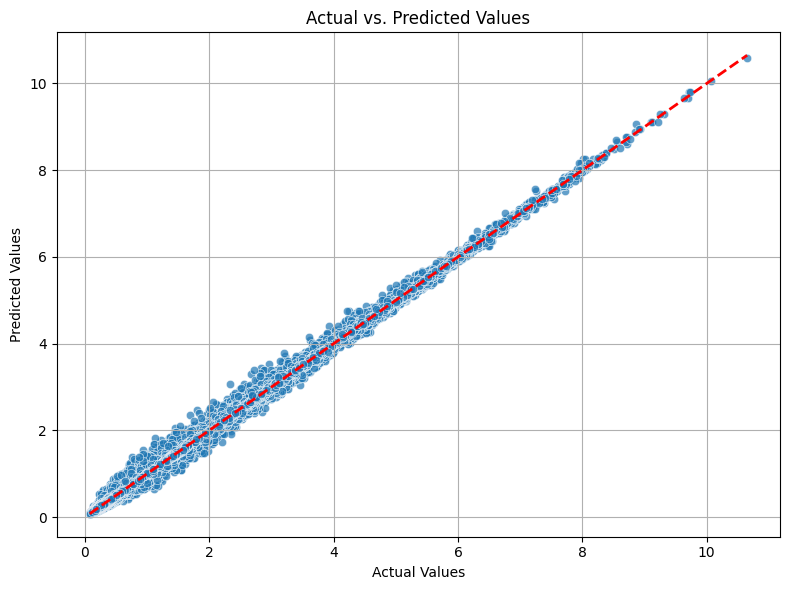

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


 Actual vs Predicted Power Usage

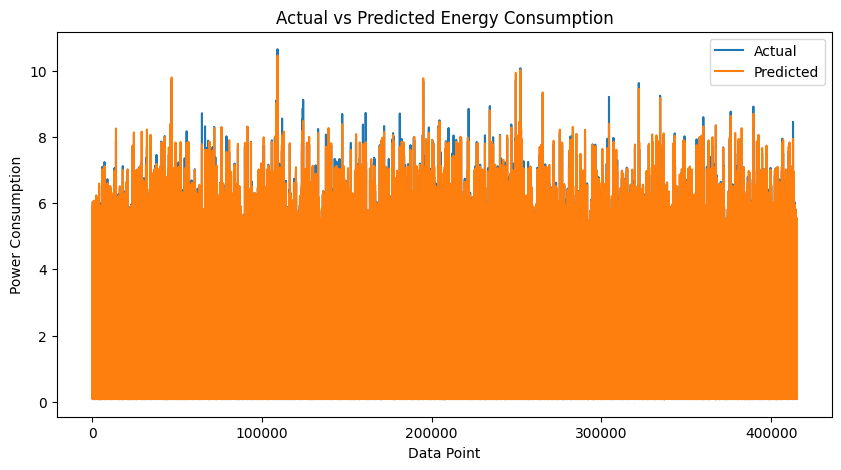

In [30]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Data Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

Feature Importance (Using Random Forest)

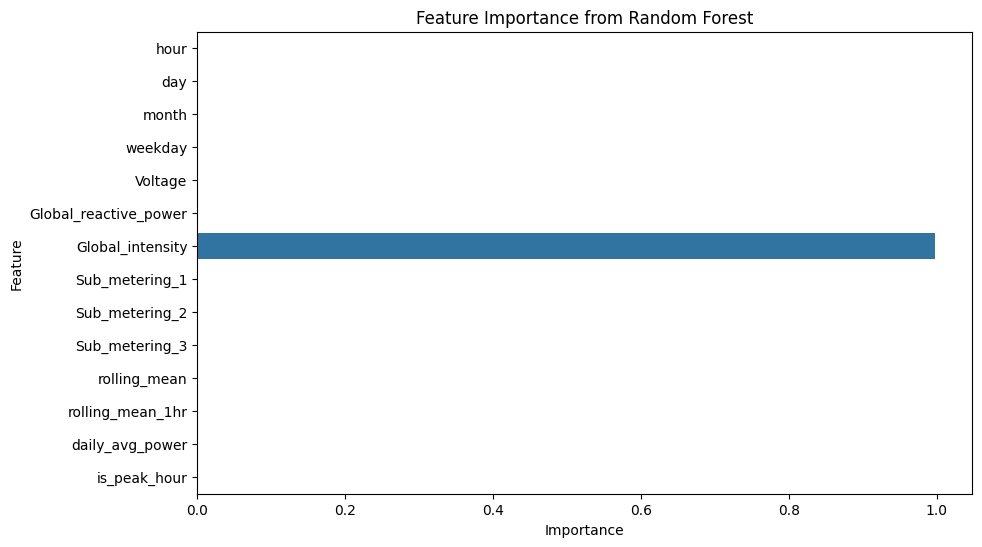

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances from your trained Random Forest model
importances = rf_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




✅ Interpretation:
Random Forest is the best overall (lowest RMSE & MAE, highest R²).

XGBoost is close behind.

Linear Regression performs well but less precise than ensemble methods.

C:\Users\vicky\AppData\Local\Temp\ipykernel_12800\1217626860.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='magma')
C:\Users\vicky\AppData\Local\Temp\ipykernel_12800\1217626860.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='magma')
C:\Users\vicky\AppData\Local\Temp\ipykernel_12800\1217626860.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='magma')


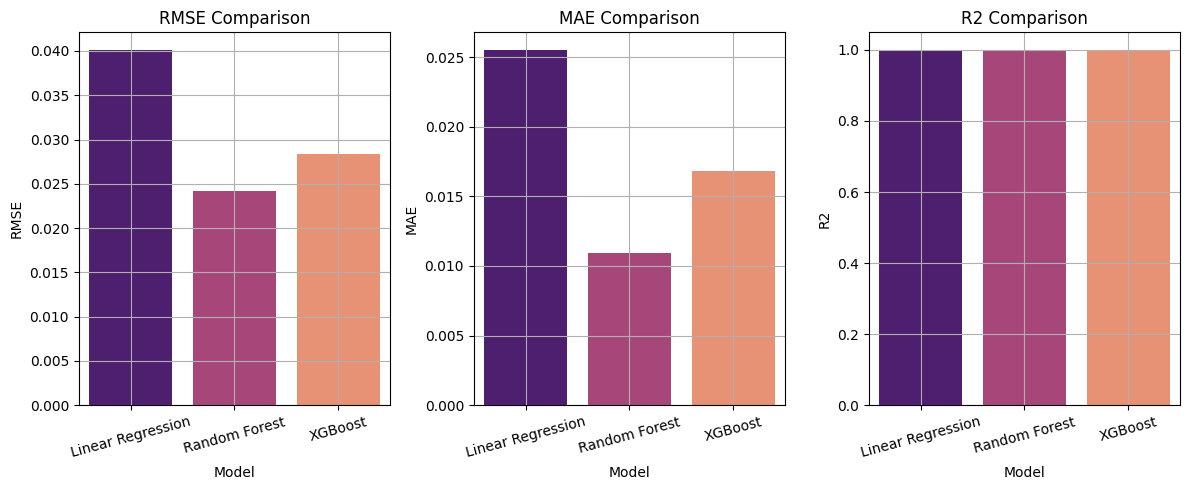

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create results dictionary
results = {
    'Linear Regression': {'RMSE': 0.0401, 'MAE': 0.0255, 'R2': 0.9986},
    'Random Forest':     {'RMSE': 0.0242, 'MAE': 0.0109, 'R2': 0.9995},
    'XGBoost':           {'RMSE': 0.0284, 'MAE': 0.0168, 'R2': 0.9993}
}

# Convert to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Plot
plt.figure(figsize=(12, 5))
metrics = ['RMSE', 'MAE', 'R2']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=results_df, x='Model', y=metric, palette='magma')
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=15)
    plt.grid(True)

plt.tight_layout()
plt.show()


 Prediction vs Actual Scatter Plots

In [35]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


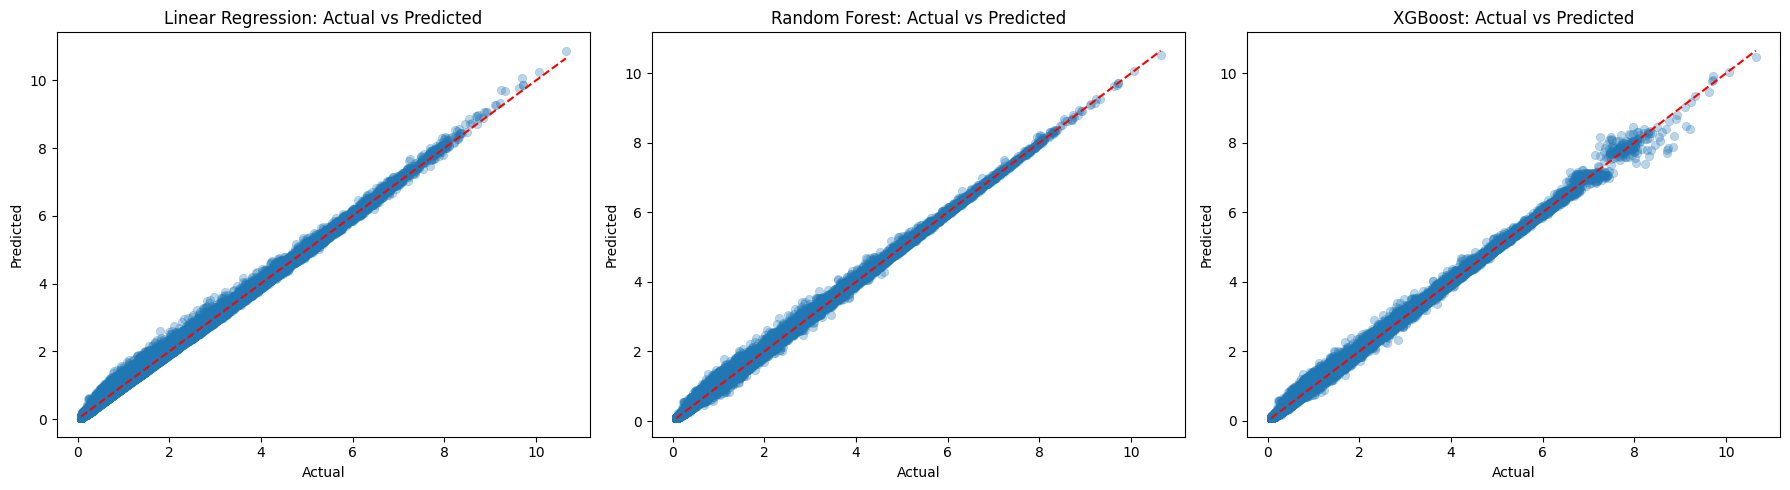

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you already have y_test, and predictions: y_pred_lr, y_pred_rf, y_pred_xgb

plt.figure(figsize=(18, 5))

models = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=preds, alpha=0.3, edgecolor=None)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # reference line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f'{name}: Actual vs Predicted')

plt.tight_layout()
plt.show()


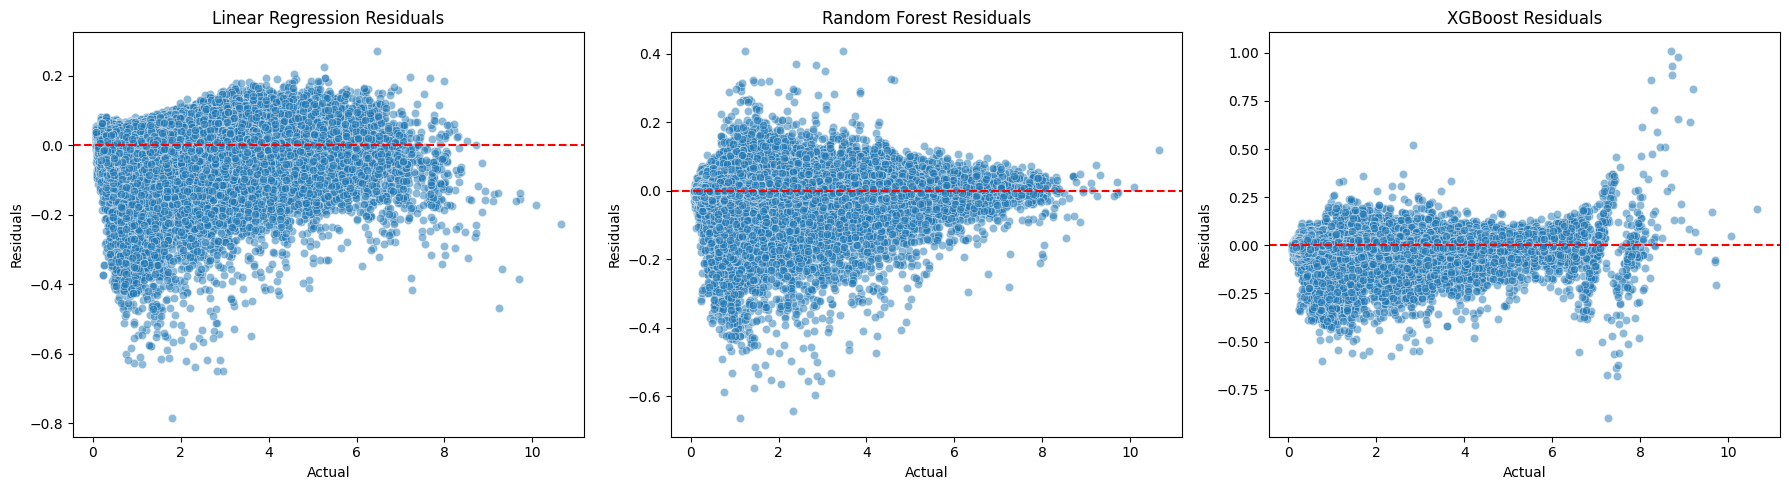

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals: actual - predicted
residuals = {
    'Linear Regression': y_test - y_pred_lr,
    'Random Forest': y_test - y_pred_rf,
    'XGBoost': y_test - y_pred_xgb
}

# Plotting
plt.figure(figsize=(18, 5))
for i, (name, res) in enumerate(residuals.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=res, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{name} Residuals')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()
